In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

ENUNCIADO A

In [90]:
x = sym.symbols("x", real=True)
y = sym.symbols("y", real=True)

ENUNCIADO B

In [91]:
z = x + sym.I*y

In [92]:
z

x + I*y

ENUNCIADO C

In [93]:
def f(z):
    return z**3 - 1

In [94]:
f = f(z)
f

(x + I*y)**3 - 1

ENUNCIADO D

In [95]:
F = [sym.re(f),sym.im(f)]

In [96]:
F

[x**3 - 3*x*y**2 - 1, 3*x**2*y - y**3]

In [97]:
F[0]

x**3 - 3*x*y**2 - 1

In [98]:
F[1]

3*x**2*y - y**3

In [103]:
Dre_x = sym.diff(F[0],x,1)
Dre_y = sym.diff(F[0],y,1)
Dim_x = sym.diff(F[1],x,1)
Dim_y = sym.diff(F[1],y,1)

In [107]:
Jacobiana = sym.Matrix([[Dre_x, Dre_y],[Dim_x, Dim_y]])

In [142]:
Jacobiana

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [161]:
Jn = sym.lambdify([x, y], Jacobiana, "numpy")

ENUNCIADO F

In [162]:
Fn = sym.lambdify([x,y],F,"numpy")

ENUNCIADO G

In [187]:
def newton_raphson_gen(z0, F, J, tolerancia=1e-7, iteraciones_max=100):
    
    zn = z0.copy()
    error = tolerancia + 1
    iteraciones = 0
    
    while error > tolerancia and iteraciones < iteraciones_max:
        Fz = F(*zn)
        Jz = J(*zn)

        dz = np.linalg.solve(Jz, Fz)
        zn1 = zn - dz

        error = np.linalg.norm(zn1 - zn)
        iteraciones += 1
        zn = zn1.copy()

    return zn1

ENUNCIADO H

In [191]:
z0 = np.array([0.5,0.5])
raiz = newton_raphson_gen(z0,Fn,Jn)

In [192]:
raiz

array([-0.5      ,  0.8660254])

ENUNCIADO I

In [186]:
N = 300
X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)

ENUNCIADO J

In [235]:
Fractal = np.zeros((N, N), np.int64)
Z0 = np.array([-0.5, ((3)**(1/2))/2])
z1 = np.array([1, 0])
z2 = np.array([-0.5, -1*((3)**(1/2))/2])

In [239]:
for i in range(N):
    for j in range(N):
        Z0 = np.array([x[i], y[j]])
        raiz = newton_raphson_(Z0, Fn, Jn)
        d_z0_z1 = np.linalg.norm(raiz - z1)
        d_z0_z2 = np.linalg.norm(raiz - z2)
        if d_z0_z1 < d_z0_z2:
            Fractal[i, j] = 20
        elif d_z0_z2 < d_z0_z1:
            Fractal[i, j] = 255
        else:
            Fractal[i, j] = 100

In [240]:
print(Fractal)

[[255 255 255 ... 100 100 100]
 [255 255 255 ... 100 100 100]
 [255 255 255 ... 100 100 100]
 ...
 [ 20  20  20 ...  20  20  20]
 [ 20  20  20 ...  20  20  20]
 [ 20  20  20 ...  20  20  20]]


ENUNCIADO K

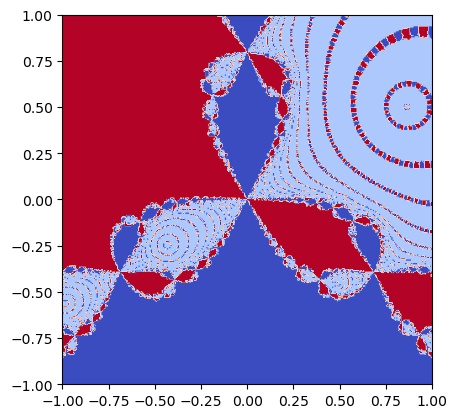

In [241]:
plt.imshow(Fractal, cmap="coolwarm" ,extent=[-1,1,-1,1])